# work date:26/09/2023

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
p = './heart_Disease_prediction_new_final.csv'
dsa1=pd.read_csv(p)
dsa1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0.0,0.0,1,0
1,49,0,3,160,180,0,0,156,0.0,1.0,2,1
2,37,1,2,130,283,0,1,98,0.0,0.0,1,0
3,48,0,4,138,214,0,0,108,1.0,1.5,2,1
4,54,1,3,150,195,0,0,122,0.0,0.0,1,0


In [34]:
dsa1.shape #its used for describe how many 

(3235, 12)

In [35]:
 def d(dataframe):
    X=dataframe.values[:,0:11]
    y=dataframe.values[:,-1]
    X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=None)
    
    tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
    cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
    m=tree_model.fit(X, y)
    prediction=m.predict(X_test)
    cm= confusion_matrix(y_test,prediction)
    sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.2, linecolor='black',annot_kws={"size": 20})
    print(classification_report(y_test, prediction))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
    print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
    print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
    print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.72       299
         1.0       0.75      0.84      0.79       348

    accuracy                           0.76       647
   macro avg       0.76      0.76      0.76       647
weighted avg       0.76      0.76      0.76       647

Testing Accuracy for Decision Tree: 0.7619783616692427
Testing Sensitivity for Decision Tree: 0.7799227799227799
Testing Specificity for Decision Tree: 0.75
Testing Precision for Decision Tree: 0.6755852842809364


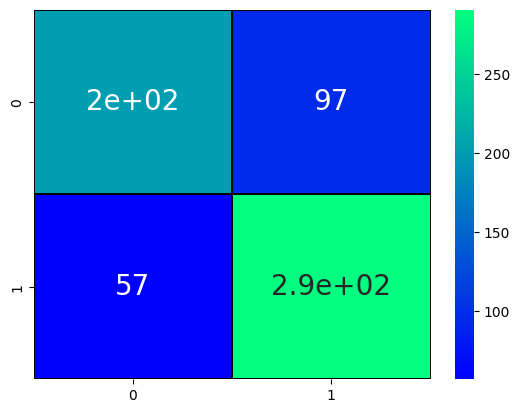

In [40]:
d(dsa1)

<Axes: >

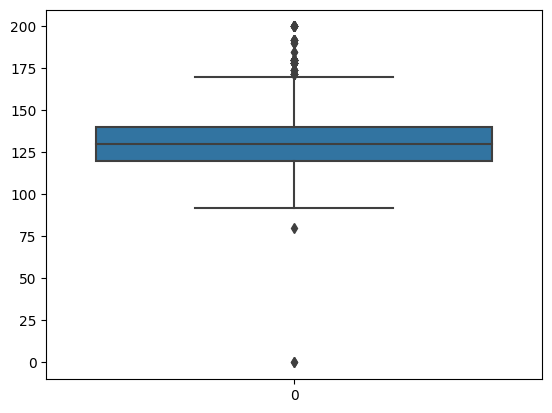

In [43]:
sns.boxplot(dsa1["trestbps"])

<Axes: >

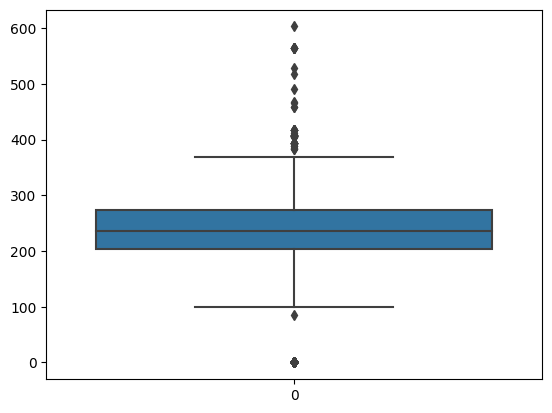

In [45]:
sns.boxplot(dsa1["chol"])

<Axes: >

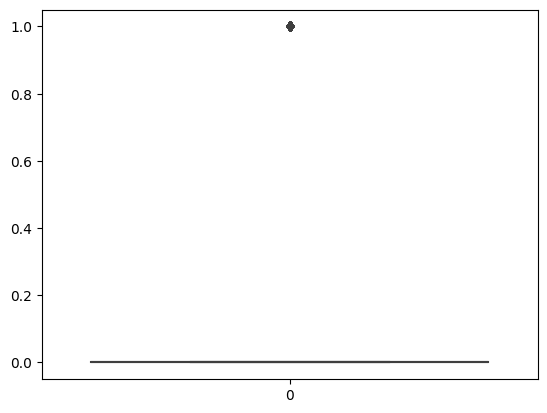

In [46]:
sns.boxplot(dsa1["fbs"])

<Axes: >

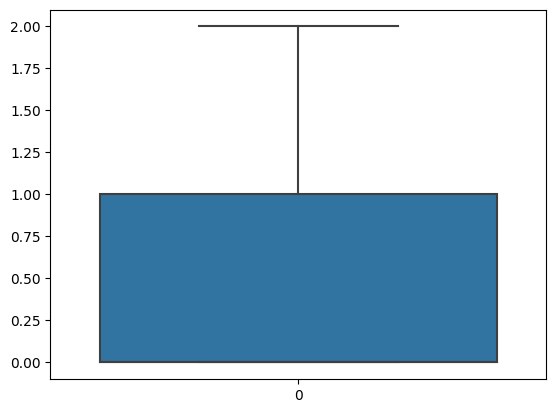

In [47]:
sns.boxplot(dsa1["restecg"])

<Axes: >

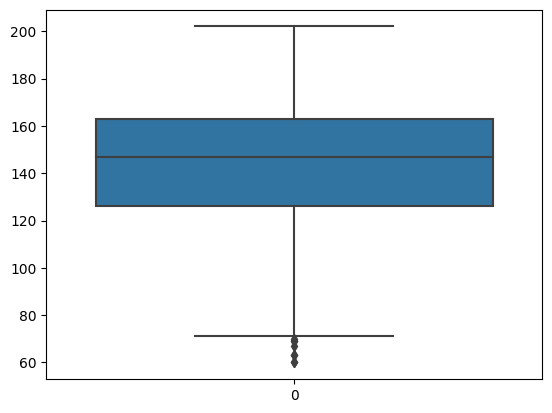

In [48]:
sns.boxplot(dsa1["thalach"])

<Axes: >

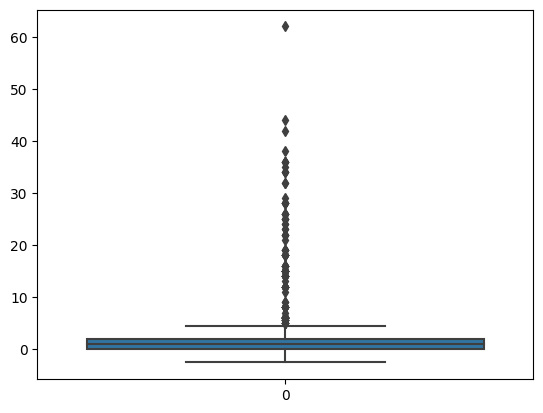

In [49]:
sns.boxplot(dsa1["oldpeak"])